# Haberman Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load data set
hbman=pd.read_csv("haberman.csv")

#adding columns names
#Survival Status =1 -->Long  Survival (lived)
#Survival Status=2--> Short Survival (Died)
hbman.columns =['Patient Age', 'Operation Age', 'Num of Nodes', 'Survival Status']


#shape --how many data points and features 305rows x4 columns 
print(hbman.shape)

#what are the column names in our dataset
print(hbman.columns)

hbman

(305, 4)
Index(['Patient Age', 'Operation Age', 'Num of Nodes', 'Survival Status'], dtype='object')


,Patient Age,Operation Age,Num of Nodes,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
#no of years patient has survived 1(long survive) or 2(short survive) 
hbman["Survival Status"].value_counts()

1    224
2     81
Name: Survival Status, dtype: int64

In [4]:
hbman["Survival Status"].describe()

count    305.000000
mean       1.265574
std        0.442364
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Survival Status, dtype: float64

# 1-D Scatter

# 1D scatter plot using data feature Survival Status and Patient Age

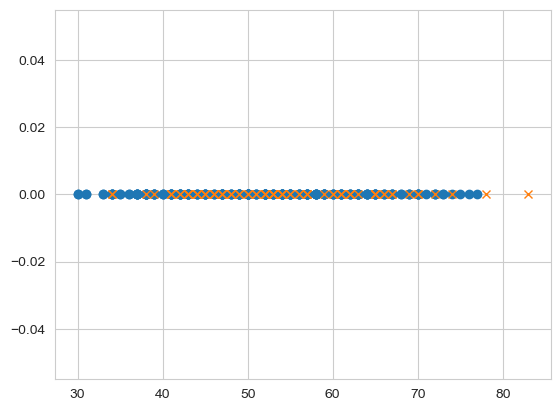

In [9]:
hbman_Long_Survive=hbman.loc[hbman["Survival Status"]==1]
hbman_Short_Survive=hbman.loc[hbman["Survival Status"]==2]

#print(hbman_1yr)

sns.set_style("whitegrid")

plt.plot(hbman_Long_Survive["Patient Age"],np.zeros_like(hbman_Long_Survive["Patient Age"]),"o")
plt.plot(hbman_Short_Survive["Patient Age"],np.zeros_like(hbman_Short_Survive["Patient Age"]),"x")

# 1D scatter plot using data feature Survival Status and Operation Age

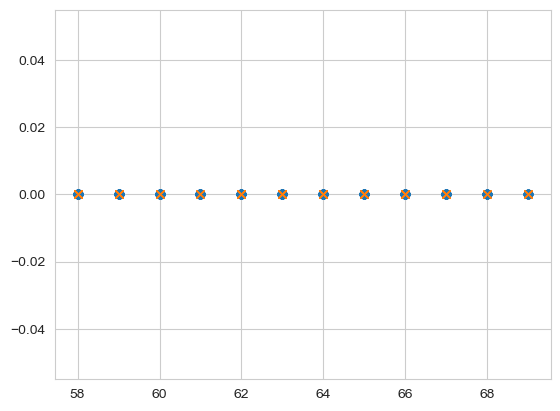

In [10]:
sns.set_style("whitegrid")

plt.plot(hbman_Long_Survive["Operation Age"],np.zeros_like(hbman_Long_Survive["Operation Age"]),"o")
plt.plot(hbman_Short_Survive["Operation Age"],np.zeros_like(hbman_Short_Survive["Operation Age"]),"x")

# 1D scatter plot using data feature Survival Status and Nodes

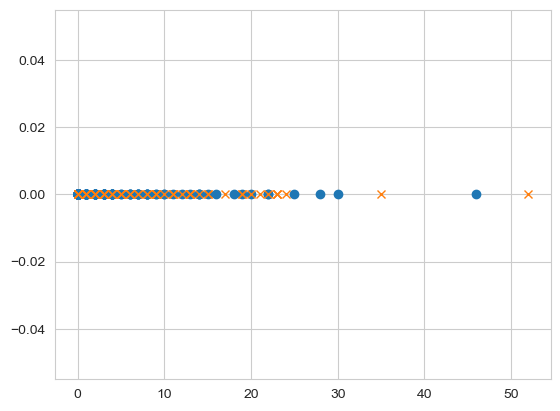

In [11]:
sns.set_style("whitegrid")

plt.plot(hbman_Long_Survive["Num of Nodes"],np.zeros_like(hbman_Long_Survive["Num of Nodes"]),"o")
plt.plot(hbman_Short_Survive["Num of Nodes"],np.zeros_like(hbman_Short_Survive["Num of Nodes"]),"x")

Obseravation:


Data of short survival status ("x") are mostly overlap on long survival status ("o") due to which you will not able to conclude on this data.

# UNIVARIATE ANALYSIS

# PDF

# 1.Patient Age Distribution

Patient Age attribute is plotted against the class attribute, Survival Status

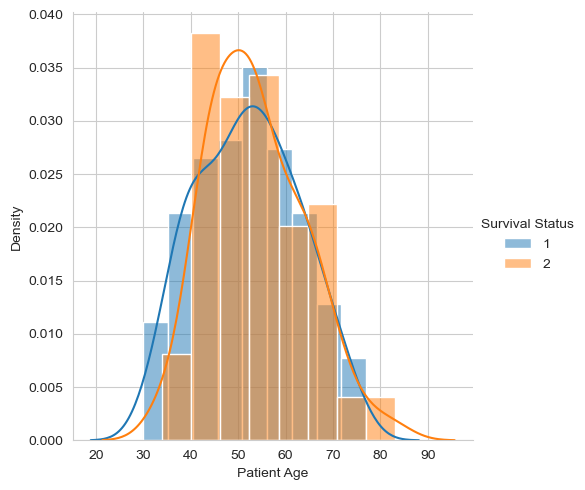

In [12]:
#Ist case : PDF of patient age
sns.set_style("whitegrid")
sns.FacetGrid(hbman, hue="Survival Status", height=5) \
    .map(sns.histplot, "Patient Age",kde=True,stat="density",kde_kws=dict(cut=3)) \
    .add_legend()
plt.show()

Observation:
    
In above plot it is observed that at the age range from 30–75 the status of survival and death is same. So, using this datapoint we cannot predict anything

# 2.Operation Age

Operation Year attribute is plotted against the class attribute, Survival Years

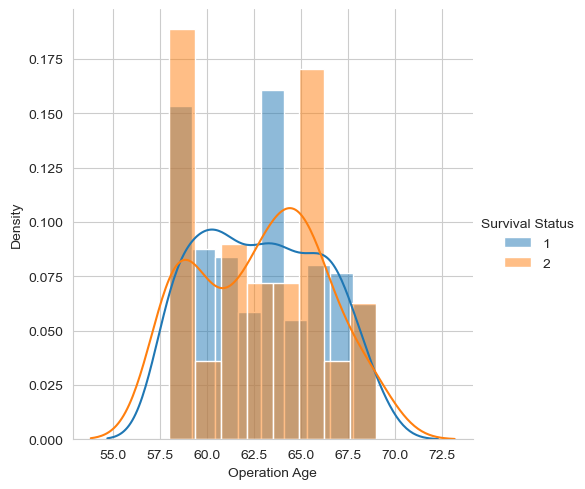

In [13]:
#2nd case : PDF of Operation Year
sns.set_style("whitegrid")
sns.FacetGrid(hbman, hue="Survival Status", height=5) \
    .map(sns.histplot, "Operation Age",kde=True,stat="density",kde_kws=dict(cut=3)) \
    .add_legend()
plt.show()

Observation: 
    
Similar here we cannot predict anything with these histograms as there is equal number of density in each data point. Even the PDF of both classification overlap on each other.

# 3.Num of Nodes

Num of Nodes attribute is plotted against the class attribute, Survival Years

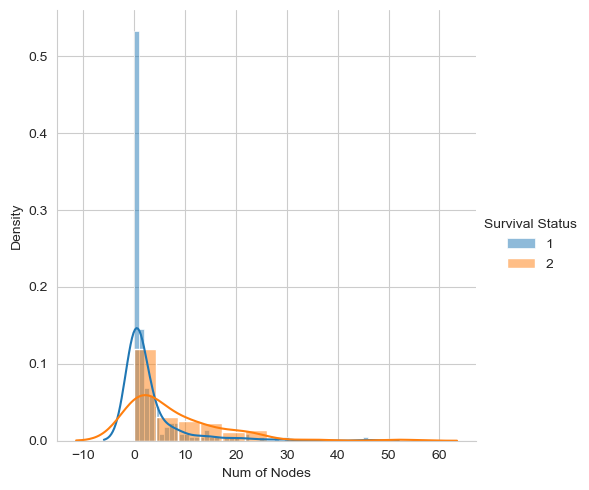

In [39]:
#3rd case of Num of Nodes
sns.set_style("whitegrid")
sns.FacetGrid(hbman, hue="Survival Status", height=5) \
    .map(sns.histplot, "Num of Nodes",kde=True,stat="density",kde_kws=dict(cut=3)) \
    .add_legend()
plt.show()

Observation: 
    
It has been observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify but this is the best data you can choose among all.

So, I accept the PDF of Axillary nodes and can conclude below result

# CDF

Only compute cdf of 3rd case as that only can deduce anything

# CDF OF  long Survive 

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


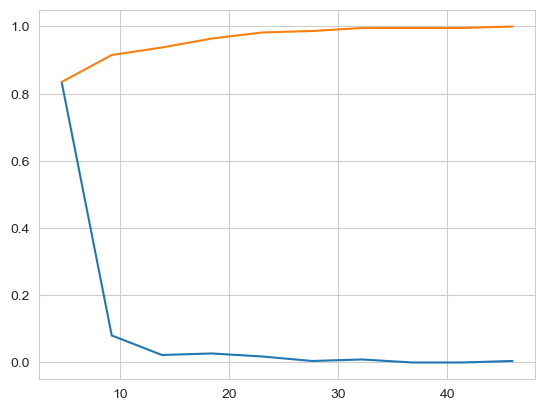

In [53]:
#automatically assigned to the variables counts and bin_edges
counts,bin_edges=np.histogram(hbman_Long_Survive['Num of Nodes'],bins=10,density=True)
#divide the range of values in the data into 10 equally spaced bins

#compute PDF
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf=np.cumsum(pdf) #commulative sum
plt.plot(bin_edges[1:],pdf) #blue
plt.plot(bin_edges[1:],cdf) #orange

#bin_edges[1:] is a slicing operation that selects all elements of the bin_edges array 
#from index 1 onwards. This is done to exclude the first element 
#because it typically represents the leftmost edge of the first bin

plt.show();

observation:
    
    
From above CDF you can observe that orange line(CDF) shows there is a 85% chance of long survival if number of axillary nodes detected are < 5. Also you can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

# CDF OF Short Survive

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


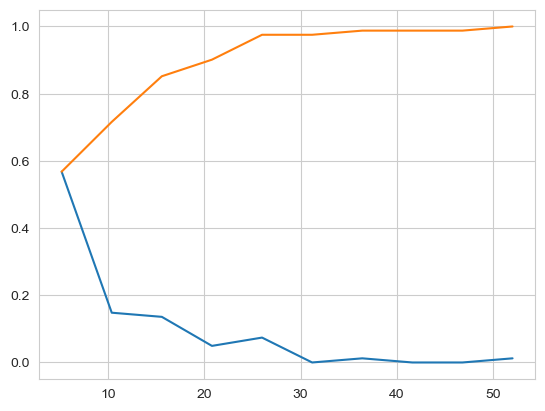

In [55]:
counts,bin_edges=np.histogram(hbman_Short_Survive['Num of Nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf) #commulative sum
plt.plot(bin_edges[1:],pdf) #green
plt.plot(bin_edges[1:],cdf) #red

plt.show()

Observations:

There is 58% chance of Short survival people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

# Mean , Variance and Standard Deviation

In [77]:
print("Means:")
print("-------------------------------------------------")
print (np.mean(hbman_Long_Survive["Num of Nodes"]))
print (np.mean(hbman_Short_Survive["Num of Nodes"]))

Means:
-------------------------------------------------
2.799107142857143
7.45679012345679


Observation:
    
probability for short survive is more in data set

In [79]:
print("\nOutlier:")
print (np.mean(np.append(hbman_Long_Survive["Num of Nodes"],50)))
print (np.mean(np.append(hbman_Short_Survive["Num of Nodes"],50)))


Outlier:
3.008888888888889
7.975609756097561


Observations:
    
Not much effect of outliers

In [80]:
print("Standard Deviation:")
print(np.mean(hbman_Long_Survive["Num of Nodes"]))
print(np.mean(hbman_Short_Survive["Num of Nodes"]))

Standard Deviation:
2.799107142857143
7.45679012345679


Observations:

spread of data for short survive is more.


In [83]:
print("\nVariance:")
print(np.var(hbman_Long_Survive["Num of Nodes"]))
print(np.var(hbman_Short_Survive["Num of Nodes"]))


Variance:
34.44624920280616
83.3345526596555


Observations:

how notably a short survive collection of data is spread out

# Median, Quantiles ,Percentile and IQR

In [88]:
print("Medians:")
print(np.median(hbman_Long_Survive["Num of Nodes"]))
print(np.median(hbman_Short_Survive["Num of Nodes"]))

Medians:
0.0
4.0


Observations:

Avg Num of Nodes in long survival is 0 and for short survival it is 4. ie, Patients who have average 4 Num of Nodes have short survival status.

In [89]:
print("Outliers:")
print(np.median(np.append(hbman_Long_Survive["Num of Nodes"],50)))
print(np.median(np.append(hbman_Short_Survive["Num of Nodes"],50)))

Outliers:
0.0
4.0


Observations:

Not much effect of outliers

In [90]:
print("Quantiles:")
print(np.percentile(hbman_Long_Survive["Num of Nodes"],np.arange(0,100,25)))
print(np.percentile(hbman_Short_Survive["Num of Nodes"],np.arange(0,100,25)))

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


Observations:
    
Quantiles shows that nearly(0,25,50) 50th% of Num of nodes are 0 in long survival and 75th% of patients have nodes less than 3 i.e 25% patients are having nodes more than 3.

Similarly, In short survival 75th% of patients have minimum 11 nodes detected.

In [91]:
from statsmodels import robust
print ("Median Absolute Deviation")
print(robust.mad(hbman_Long_Survive["Num of Nodes"]))
print(robust.mad(hbman_Short_Survive["Num of Nodes"]))

Median Absolute Deviation
0.0
5.930408874022408


Observations:


The median absolute deviation(MAD) is a robust measure of how spread out a set of data is. The variance and standard deviation are also measures of spread, but they are more affected by outliers.

In [94]:
q1_hbman_Long_Survive = np.percentile(hbman_Long_Survive["Num of Nodes"], 25)
q3_hbman_Long_Survive = np.percentile(hbman_Long_Survive["Num of Nodes"], 75)
iqr_hbman_Long_Survive= q3_hbman_Long_Survive - q1_hbman_Long_Survive
print("IQR for hbman_Long_Survive:", iqr_hbman_Long_Survive)

q1_hbman_Short_Survive = np.percentile(hbman_Short_Survive["Num of Nodes"], 25)
q3_hbman_Short_Survive = np.percentile(hbman_Short_Survive["Num of Nodes"], 75)
iqr_hbman_Short_Survive= q3_hbman_Short_Survive - q1_hbman_Long_Survive
print("IQR for hbman_Short_Survive:", iqr_hbman_Short_Survive)

IQR for hbman_Long_Survive: 3.0
IQR for hbman_Short_Survive: 11.0


# BOX PLOTS

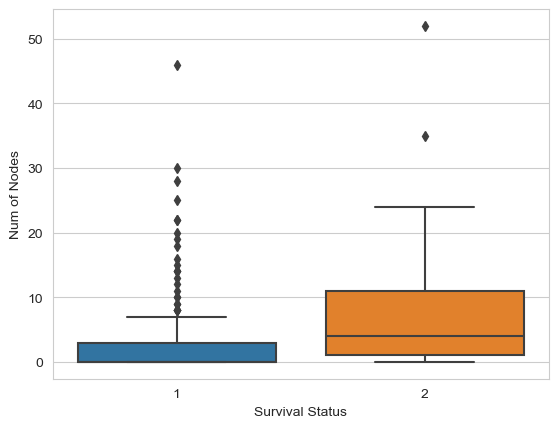

In [98]:
sns.set_style("whitegrid")
sns.boxplot(data=hbman,x='Survival Status',y='Num of Nodes')
plt.show()

Observations:
    
In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. 

Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2

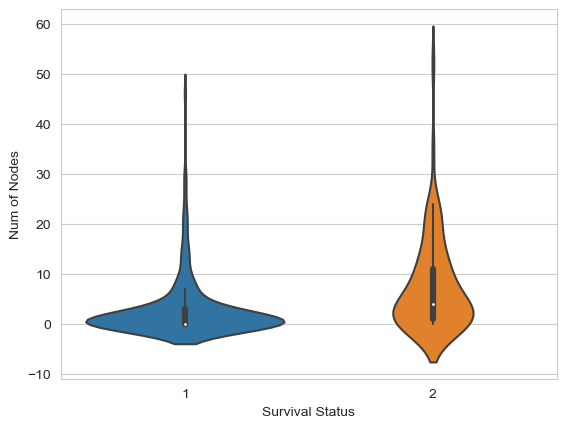

In [100]:
sns.set_style("whitegrid")
sns.violinplot(data=hbman,x='Survival Status',y='Num of Nodes')
plt.show()

Observation:

In above violin plot we observe that For long survive density for it is more near the 0 "No of nodes" and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–12.

# Multivariate Probability Density (MPD) ,Contour Plot

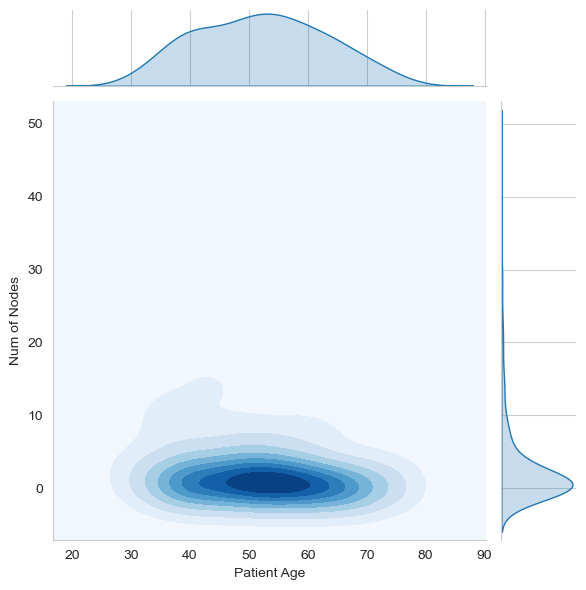

In [104]:
sns.jointplot(data=hbman_Long_Survive,kind='kde',x='Patient Age',y='Num of Nodes',fill=True, thresh=0, cmap='Blues')
plt.show();


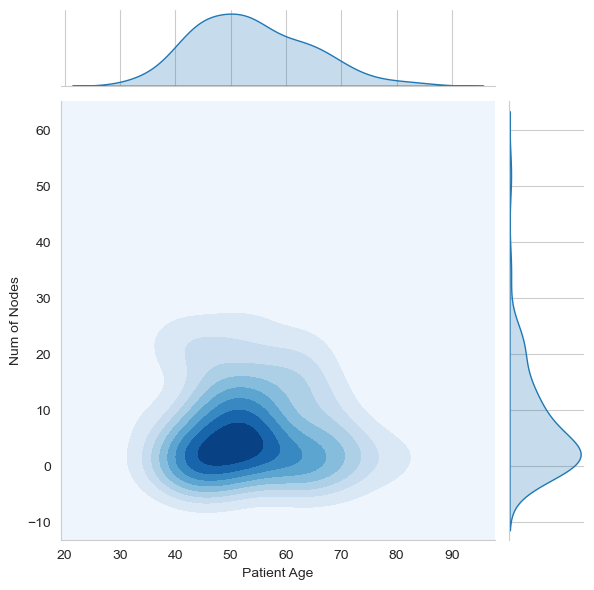

In [105]:
sns.jointplot(data=hbman_Short_Survive,kind='kde',x='Patient Age',y='Num of Nodes',fill=True, thresh=0, cmap='Blues')
plt.show();